In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('Bank Data.csv')

In [3]:
# step1 : Data exploration

In [4]:
print (df.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           42502.000000       50000.000000     50000.000000   
mean             4182.004291          16.838260        22.921480   
std              3174.109304         116.396848       129.314804   
min               303.645417          -1.000000         0.000000   
25%              1625.188333           3.000000         4.000000   
50%              3086.305000           6.000000         5.000000   
75%              5934.189094           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   50000.000000         50000.000000          48965.000000   
mean       68.772640            21.052640             30.080200   
std       451.602363            14.860397            196.984121   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [5]:
print(df.isnull().sum()) #check for missing values

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64


In [6]:
# handle missing values

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [7]:
# Handling missing values in categorical columns

cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy ="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [8]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
x = df.drop('Credit_Mix', axis =1 )
y = df['Credit_Mix']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()
xgb_clf = XGBClassifier()

In [13]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "SVM": svm_clf,
    "XGBoost": xgb_clf
}

In [14]:
# Function to train and evaluate models

def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average ="weighted")
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print("="*40)

In [15]:
for model_name, model in models.items():
    train_evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.6115
Precision: 0.5376156890388071
Recall: 0.6115
F1 Score: 0.5566823730314142
Confusion Matrix:
[[1396   27  451   46]
 [   2 1909  504   43]
 [ 222  555 2766  112]
 [ 398  578  947   44]]
Model: RandomForestClassifier
Accuracy: 0.7614
Precision: 0.6645220206680783
Recall: 0.7614
F1 Score: 0.694267932576172
Confusion Matrix:
[[1834    0   32   54]
 [   0 2344   49   65]
 [  59  105 3378  113]
 [ 442  602  865   58]]
Model: SVC
Accuracy: 0.6763
Precision: 0.565960037259625
Recall: 0.6763
F1 Score: 0.6027193966539871
Confusion Matrix:
[[1677    1  237    5]
 [   0 2255  203    0]
 [ 204  617 2830    4]
 [ 446  694  826    1]]
Model: XGBClassifier
Accuracy: 0.7588
Precision: 0.649726112037657
Recall: 0.7588
F1 Score: 0.685631966578194
Confusion Matrix:
[[1827    0   55   38]
 [   0 2345   74   39]
 [  77  114 3387   77]
 [ 450  606  882   29]]


In [16]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10]
    
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [19]:
best_rf = grid_search.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
train_evaluate_model(best_rf, X_train, X_test, y_train, y_test)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Model: RandomForestClassifier
Accuracy: 0.7681
Precision: 0.663099868996061
Recall: 0.7681
F1 Score: 0.6904983690173441
Confusion Matrix:
[[1862    0   38   20]
 [   0 2382   63   13]
 [  64  126 3415   50]
 [ 455  615  875   22]]


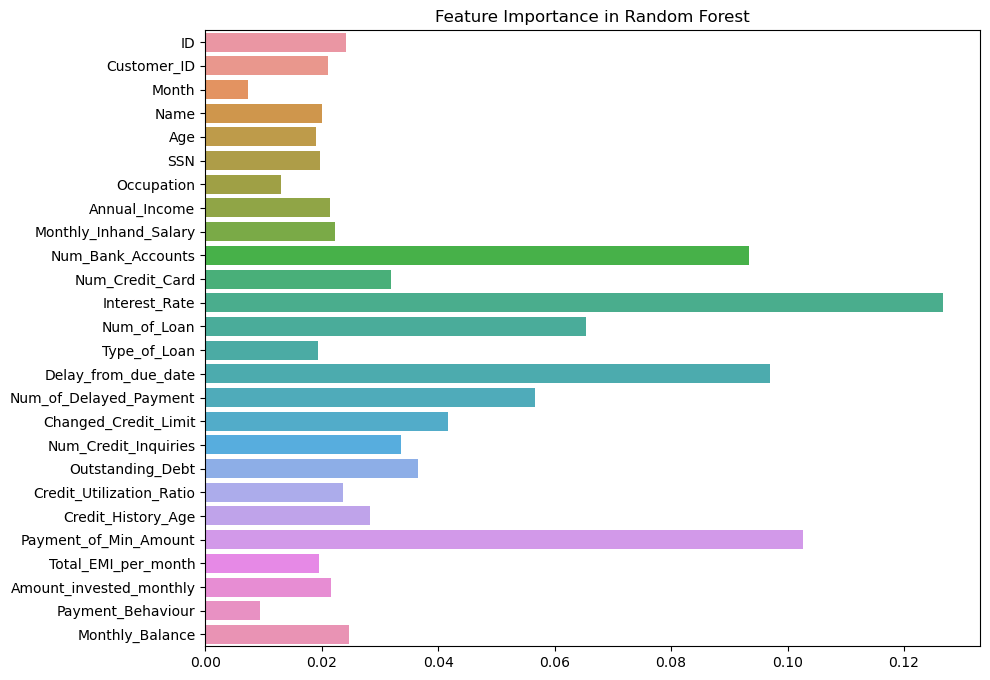

In [21]:
importance = best_rf.feature_importances_
features= x.columns
plt.figure(figsize=(10,8))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Random Forest")
plt.show()